In [1]:
%matplotlib inline

from time import sleep
from random import sample
from time import sleep
import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
env = gym.make('CartPole-v0')

In [2]:
nactions =  2
nparams = 4
learning_rate = 0.1
gamma = .9
beta = 0.9
nepisode = 100

In [3]:
_input = tf.placeholder(shape=[1, nparams], dtype=tf.float32)

# Hidden layer 1
w0 = tf.Variable(tf.random_uniform([4, 16],0 , 0.01))
b0 = tf.Variable(tf.random_uniform([1, 16], 0, 0.01))
z0 = tf.add(tf.matmul(_input, w0), b0)
h0 = tf.nn.tanh(z0)

w1 = tf.Variable(tf.random_uniform([16, 2],0 , 0.01))
b1 = tf.Variable(tf.random_uniform([1, 2], 0, 0.01))
Q = tf.add(tf.matmul(h0, w1), b1)
# Q = tf.nn.softmax(z1)

Qa = tf.argmax(Q, 1)
print(Qa)
Qe = tf.placeholder(shape=[1, nactions], dtype=tf.float32)
error = tf.reduce_sum(tf.square(Qe - Q))
trainer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(error)

Tensor("ArgMax:0", shape=(1,), dtype=int64)


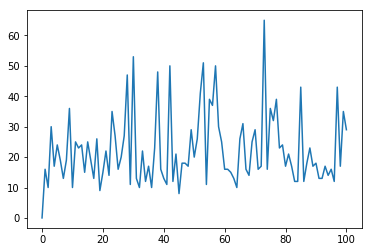

In [4]:

init = tf.global_variables_initializer()
steps = [0]
with tf.Session() as sess:
    D=[]
    sess.run(init)
    for i in range(nepisode):
        state = env.reset()
        done = False
        step = 0
        r = 0
        while done == False:
            step+=1
            # agent do something new
            res_action, res_Q = sess.run([Qa, Q], feed_dict={_input:[state]})
            if  np.random.rand(1) < beta:
                new_action = env.action_space.sample()
                res_action[0] = new_action
               
            
            # do action 
            new_state, reward, done, _ = env.step(res_action[0])
#             print(res_action[0])
            if done:
                if step<200:
                    reward=-1
                else:
                    reward=1
                if step>max(steps):
                    beta=beta*0.9
                    
            else:
                reward=0
            D.append( (state, res_action[0], reward , new_state, done, res_Q) )
            
                  
            # update weight
            
            for s, a, r , sn, d, q in random.sample(D, min(10, len(D))):
                # cal reward
                #y = None
                qn=q
                if d:
                    y=r
                else:
                    next_Q = sess.run(Q, feed_dict={_input:[sn]})
                    
                    y= r + gamma*np.max(next_Q)
                qn[0, a]=y
                _, hQ,hQe=sess.run([trainer, Q, Qe], feed_dict={_input:[s], Qe:qn})  
                q = hQ
            state = new_state
            env.render()
        steps.append(step)
    
plt.plot(steps)

In [5]:
hQ

array([[-0.10160554, -0.13071577]], dtype=float32)

In [6]:
hQe

array([[-0.09143591, -0.11335384]], dtype=float32)

In [7]:
step

29

In [8]:
D

[(array([ 0.01669922,  0.04132784, -0.01117112, -0.04157241]),
  0,
  0,
  array([ 0.01752577, -0.15363215, -0.01200257,  0.24756509]),
  False,
  array([[-0.0882772 ,  0.00200229]], dtype=float32)),
 (array([ 0.01752577, -0.15363215, -0.01200257,  0.24756509]),
  1,
  0,
  array([ 0.01445313,  0.04165914, -0.00705127, -0.04887942]),
  False,
  array([[ 0.00898607, -0.09705786]], dtype=float32)),
 (array([ 0.01445313,  0.04165914, -0.00705127, -0.04887942]),
  0,
  0,
  array([ 0.01528631, -0.153361  , -0.00802886,  0.24157046]),
  False,
  array([[-0.0832551 ,  0.00296561]], dtype=float32)),
 (array([ 0.01528631, -0.153361  , -0.00802886,  0.24157046]),
  1,
  0,
  array([ 0.01221909,  0.04187472, -0.00319745, -0.05363413]),
  False,
  array([[ 0.00857517, -0.0791621 ]], dtype=float32)),
 (array([ 0.01221909,  0.04187472, -0.00319745, -0.05363413]),
  0,
  0,
  array([ 0.01305659, -0.15320124, -0.00427013,  0.23803826]),
  False,
  array([[-0.08136324,  0.00437553]], dtype=float32)),
